In [1]:
import numpy as np
from main import BlockAnalysis
import matplotlib.pyplot as plt

In [2]:
time, rg, bias = np.loadtxt('RG_BIAS',unpack=True)

In [3]:
blocks = BlockAnalysis(rg,bias=bias,T=310,multi=2)

In [4]:
blocks.stat

array([[1.00000000e+00, 6.17552534e-02, 6.18956061e-05],
       [2.00000000e+00, 7.58962488e-02, 1.07577552e-04],
       [3.00000000e+00, 8.61136066e-02, 1.49492426e-04],
       [4.00000000e+00, 9.52537180e-02, 1.90940982e-04],
       [6.00000000e+00, 1.08876205e-01, 2.67298607e-04],
       [9.00000000e+00, 1.25495681e-01, 3.77345728e-04],
       [1.20000000e+01, 1.38755846e-01, 4.81762093e-04],
       [1.80000000e+01, 1.58947836e-01, 6.75902729e-04],
       [3.10000000e+01, 1.92161859e-01, 1.07237588e-03],
       [3.60000000e+01, 1.99403184e-01, 1.19918040e-03],
       [6.20000000e+01, 2.42649441e-01, 1.91508329e-03],
       [9.30000000e+01, 2.72682485e-01, 2.63587475e-03],
       [1.24000000e+02, 2.95647733e-01, 3.30008385e-03],
       [1.86000000e+02, 3.34370959e-01, 4.57142563e-03],
       [2.23000000e+02, 3.50930283e-01, 5.25358863e-03],
       [2.79000000e+02, 3.66459696e-01, 6.13670925e-03],
       [3.72000000e+02, 3.98861567e-01, 7.71332250e-03],
       [4.46000000e+02, 4.16187

<ErrorbarContainer object of 3 artists>

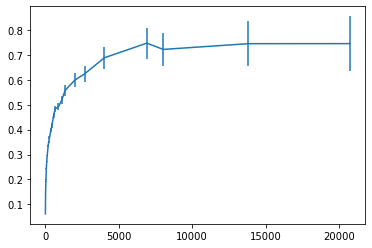

In [5]:
plt.errorbar(blocks.stat[...,0], blocks.stat[...,1], blocks.stat[...,2])

In [ ]:
def fblocking(cv, w, kbt, multi=1, interval=None):

    N, n_blocks, block_sizes = blocker(cv, multi=multi)
    u, bins = np.histogram(cv,weights=w,bins=50)
    u = u/N
   
    err = np.zeros(len(block_sizes))
    err_err = np.zeros(len(block_sizes))
    for b in range(len(block_sizes)):
        Nb = n_blocks[b]
        his = np.zeros(len(bins)-1)
        for n in range(Nb):
            start = int( n*block_sizes[b] )
            end = int( start + block_sizes[b] )
            hi = np.histogram(cv[start:end], weights=w[start:end], bins=bins)[0] / len(cv[start:end])
            his += (hi-u)**2
        e = np.sqrt( his / (Nb*(Nb-1)) )
        e = kbt*e/u
        err[b] += e.mean()
        err_err[b] += err[b] / np.sqrt( 2*(Nb-1) )
   
    return np.flip( np.array([block_sizes, err, err_err]).T , axis=0  )

In [ ]:
fblocking(blocks.x, blocks.w, blocks.kbT, multi=2, interval=None)